In [2]:
# import library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy import stats

In [3]:
# Generate Random Data/Distribution * -------------------------
np.random.seed(1)
m1, m2 = np.random.randint(0, 20, size=2)
np.random.seed(0)
s1, s2 = np.random.rand(2)*3
np.random.seed(5)
n1, n2 = np.random.randint(100, 1000, size=2)
print("* Generator Setting Parameters")
print(f"n1: {n1:d}, n2: {n2:d}")
print(f"mean1: {m1:.2f}, std1: {s1:.2f}")
print(f"mean2: {m2:.2f}, std2: {s2:.2f}")
print()

d1 = np.sort(np.random.normal(m1, s1, size=n1))
d2 = np.sort(np.random.normal(m2, s2, size=n2))
# d1 = np.array([1,4,5,6,9])
# d2 = np.array([19, 21, 24, 26, 29])

m1 = d1.mean(); s1 = d1.std(); n1 = len(d1)
m2 = d2.mean(); s2 = d2.std(); n2 = len(d2)
print("* Generated Parameters")
print(f"n1: {n1:d}, n2: {n2:d}")
print(f"mean1: {m1:.2f}, std1: {s1:.2f}")
print(f"mean2: {m2:.2f}, std2: {s2:.2f}")
print()

dist_X = np.hstack([d1,d2])       # Mixing data
print("* Generated Data Shape")
print(dist_X.shape)

* Generator Setting Parameters
n1: 967, n2: 306
mean1: 5.00, std1: 1.65
mean2: 11.00, std2: 2.15

* Generated Parameters
n1: 967, n2: 306
mean1: 5.04, std1: 1.63
mean2: 11.26, std2: 2.18

* Generated Data Shape
(1273,)


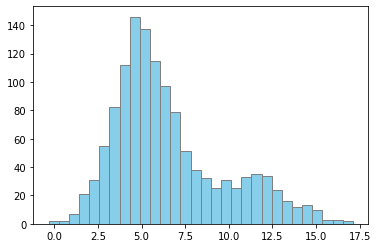

In [4]:
# parameter display *
plt.figure()
plt.hist(dist_X, bins=30, edgecolor='gray', color='skyblue')
plt.show()

In [5]:
# GMM (Gaussian Mixture) ##################################################

In [6]:
# plotting function
def display_plot(x, dist1, pi1, dist2, pi2, return_plot=True):
    if return_plot is True:
        fig = plt.figure()
    bins = 30 if len(dist_X) >= 30 else None
    plt.hist(dist_X, bins=bins, edgecolor='gray', density=True, color='skyblue')
    plt.plot(x, dist1.pdf(x) * pi1, color='mediumseagreen', label='group1_PDF')
    plt.plot(x, dist2.pdf(x) * pi2, color='coral', label='group2_PDF')
    plt.legend(loc='upper right')
    if return_plot is True:
        plt.close()
        return fig

In [7]:
# Initialize *
np.random.seed(0)
pi1 = np.random.rand()
pi2 = 1-pi1

np.random.seed(0)
m1_pred, m2_pred = np.random.rand(2)
s1_pred, s2_pred = np.random.rand(2)

# iteratioin *
result_plots = []
result_parameters = []
for i in range(100):
    #----- E-Step (Expectation) -----------------------------------------------
    # gaussian_function
    gaussian1 = stats.norm(m1_pred, s1_pred)
    gaussian2 = stats.norm(m2_pred, s2_pred)

    # classification
    dist_pdf = np.vstack([gaussian1.pdf(dist_X), gaussian2.pdf(dist_X)]).T

    # latent variable gamma(γ)  *responsibility
    evidence = (pi1 * dist_pdf[:,0] + pi2 * dist_pdf[:,1]) 
    gamma1 = (pi1 * dist_pdf[:,0] /evidence)
    gamma2 = (pi2 * dist_pdf[:,1] /evidence)

    #----- M-Step (Maximization) -----------------------------------------------
    m1_pred = (gamma1*dist_X).sum() / gamma1.sum()
    m2_pred = (gamma2*dist_X).sum() / gamma2.sum()
    
    s1_pred = np.sqrt( (gamma1*((dist_X-m1_pred)**2)).sum() / gamma1.sum() )
    s2_pred = np.sqrt( (gamma2*((dist_X-m2_pred)**2)).sum() / gamma2.sum() )

    pi1 = gamma1.mean()
    pi2 = gamma2.mean()
    
    #----- draw-graph ---------------------------------------------------------
    xp = np.linspace(-2, 20, 100)
    f = display_plot(xp, gaussian1, pi1, gaussian2, pi2)
    result_plots.append(f)
    result_parameters.append([gaussian1, pi1, gaussian2, pi2])
    # -------------------------------------------------------------------------

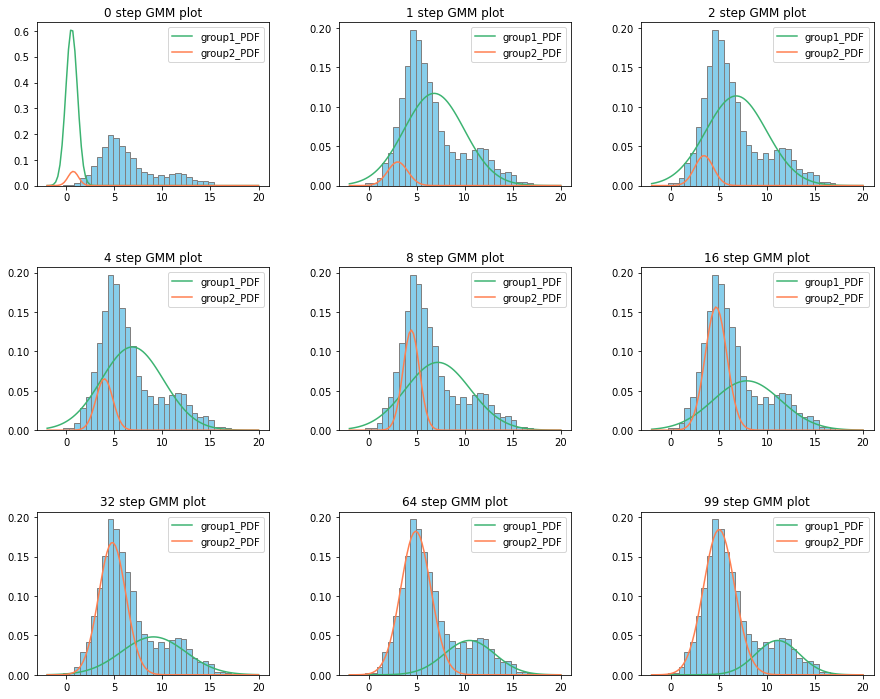

In [8]:
plt.figure(figsize=(15,12))
for e, i in enumerate([0,1,2,4,8,16,32,64,99]):
    plt.subplot(3,3,e+1)
    plt.title(f"{i} step GMM plot")
    display_plot(xp, *result_parameters[i], return_plot=False)
plt.subplots_adjust(hspace=0.5, wspace=0.3)
plt.show()

In [9]:
# compare parameter *
print("* Learned Parameters")
print(f"n1: {pi1*len(dist_X):.1f}, n2: {pi2*len(dist_X):.1f}")
print(f"mean1: {m1_pred:.2f}, std1: {s1_pred:.2f}")
print(f"mean2: {m2_pred:.2f}, std2: {s2_pred:.2f}")
print()

print("* Real Parameters")
print(f"n1: {n1:d}, n2: {n2:d}")
print(f"mean1: {m1:.2f}, std1: {s1:.2f}")
print(f"mean2: {m2:.2f}, std2: {s2:.2f}")
print()

* Learned Parameters
n1: 316.4, n2: 956.6
mean1: 11.11, std1: 2.27
mean2: 5.02, std2: 1.63

* Real Parameters
n1: 967, n2: 306
mean1: 5.04, std1: 1.63
mean2: 11.26, std2: 2.18



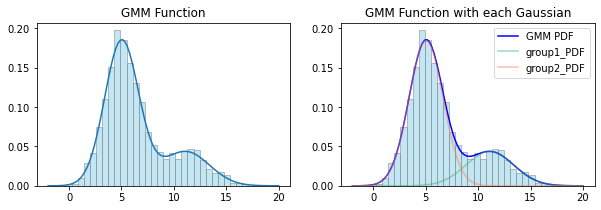

In [11]:
# gmm_pdf_function *
def gmm_pdf(x, pi1, gaussian1, pi2, gaussian2):
    return pi1 * gaussian1.pdf(x) + pi2* gaussian2.pdf(x)

plt.figure(figsize=(10,3))
plt.subplot(1,2,1)
plt.title('GMM Function')
plt.hist(dist_X, bins=30, edgecolor='gray', density=True,alpha=0.5, color='skyblue')
plt.plot(xp, gmm_pdf(xp, pi1, gaussian1, pi2, gaussian2))

plt.subplot(1,2,2)
plt.title('GMM Function with each Gaussian')
plt.plot(xp, gmm_pdf(xp, pi1, gaussian1, pi2, gaussian2), color='blue', label='GMM PDF')
plt.hist(dist_X, bins=30, edgecolor='gray', density=True, color='skyblue', alpha=0.5)
plt.plot(xp, gaussian1.pdf(xp) * pi1, color='mediumseagreen', label='group1_PDF', alpha=0.5)
plt.plot(xp, gaussian2.pdf(xp) * pi2, color='coral', label='group2_PDF', alpha=0.5)
plt.legend(loc='upper right')
plt.show()

In [12]:
# sklearn gaussian mixture  ------------------------------------------------
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=2)
# gmm.fit_predict(dist_X.reshape(-1,1))

gmm.fit(dist_X.reshape(-1,1))
gmm.predict(dist_X.reshape(-1,1))

array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

In [13]:

# compare parameters *
print("* Learned Parameters (sklearn)")
print(f"n1: {gmm.weights_[0]*len(dist_X):.1f}, n2: {gmm.weights_[1]*len(dist_X):.1f}")
print(f"mean1: {gmm.means_[0][0]:.2f}, std1: {gmm.covariances_[0][0][0]:.2f}")
print(f"mean2: {gmm.means_[1][0]:.2f}, std2: {gmm.covariances_[1][0][0]:.2f}")
print()

print("* Learned Parameters")
print(f"n1: {pi1*len(dist_X):.1f}, n2: {pi2*len(dist_X):.1f}")
print(f"mean1: {m1_pred:.2f}, std1: {s1_pred:.2f}")
print(f"mean2: {m2_pred:.2f}, std2: {s2_pred:.2f}")
print()

print("* Real Parameters")
print(f"n1: {n1:d}, n2: {n2:d}")
print(f"mean1: {m1:.2f}, std1: {s1:.2f}")
print(f"mean2: {m2:.2f}, std2: {s2:.2f}")
print()


* Learned Parameters (sklearn)
n1: 962.1, n2: 310.9
mean1: 5.04, std1: 2.66
mean2: 11.18, std2: 4.94

* Learned Parameters
n1: 316.4, n2: 956.6
mean1: 11.11, std1: 2.27
mean2: 5.02, std2: 1.63

* Real Parameters
n1: 967, n2: 306
mean1: 5.04, std1: 1.63
mean2: 11.26, std2: 2.18

